In [1]:
import pandas as pd
from google.colab import files
import io
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [2]:
uploaded = files.upload()

Saving adult_data_test.xlsx to adult_data_test.xlsx
Saving data_adult.xlsx to data_adult.xlsx


In [3]:
df_train = pd.read_excel(io.BytesIO(uploaded['data_adult.xlsx']))
df_test = pd.read_excel(io.BytesIO(uploaded['adult_data_test.xlsx']))

In [4]:
df_train["Listing of attributes"].replace({" <=50K": "less", " >50K": "more"}, inplace=True)
df_test["Listing of attributes"].replace({" <=50K.": "less", " >50K.": "more"}, inplace=True)

In [5]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [6]:
print(df)

       Age      Workclass  Fnlwgt      Education  Education-num  \
0       66              ?  186061   Some-college             10   
1       82        Private  132870        HS-grad              9   
2       90              ?   77053        HS-grad              9   
3       41        Private  264663   Some-college             10   
4       54        Private  140359        7th-8th              4   
...    ...            ...     ...            ...            ...   
48837   33        Private  245211      Bachelors             13   
48838   39        Private  215419      Bachelors             13   
48839   64              ?  321403        HS-grad              9   
48840   38        Private  374983      Bachelors             13   
48841   35   Self-emp-inc  182148      Bachelors             13   

            Marital-status          Occupation     Relationship    Race  \
0                  Widowed                   ?        Unmarried   Black   
1                  Widowed     Exec-manageria

In [7]:
print(df.isna().sum())

Age                      0
Workclass                0
Fnlwgt                   0
Education                0
Education-num            0
Marital-status           0
Occupation               0
Relationship             0
Race                     0
Sex                      0
Capital-gain             0
Capital-loss             0
Hours-per-week           0
Native-country           0
Listing of attributes    0
dtype: int64


In [8]:
df = df.drop("Education-num", axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    48842 non-null  int64 
 1   Workclass              48842 non-null  object
 2   Fnlwgt                 48842 non-null  int64 
 3   Education              48842 non-null  object
 4   Marital-status         48842 non-null  object
 5   Occupation             48842 non-null  object
 6   Relationship           48842 non-null  object
 7   Race                   48842 non-null  object
 8   Sex                    48842 non-null  object
 9   Capital-gain           48842 non-null  int64 
 10  Capital-loss           48842 non-null  int64 
 11  Hours-per-week         48842 non-null  int64 
 12  Native-country         48842 non-null  object
 13  Listing of attributes  48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [10]:
df['Listing of attributes'].value_counts(normalize=True)

less    0.760718
more    0.239282
Name: Listing of attributes, dtype: float64

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
categorical_cols = X.select_dtypes(include='object').columns
X_cat = X[categorical_cols]

numerical_cols = X.select_dtypes(include='number').columns
X_num = X[numerical_cols]

In [13]:
print(categorical_cols)
print(numerical_cols)

Index(['Workclass', 'Education', 'Marital-status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native-country'],
      dtype='object')
Index(['Age', 'Fnlwgt', 'Capital-gain', 'Capital-loss', 'Hours-per-week'], dtype='object')


In [14]:
l_encoder = LabelEncoder()

for cat_col in X_cat.columns:
    # Apply the encoder
    X_cat[cat_col] = l_encoder.fit_transform(X_cat[cat_col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
print(np.unique(y, return_counts=True))

(array(['less', 'more'], dtype=object), array([37155, 11687]))


In [16]:
X_ready = pd.concat([X_num, X_cat], axis=1)

In [17]:
print(X_ready.isna().sum())

Age               0
Fnlwgt            0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Workclass         0
Education         0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Native-country    0
dtype: int64


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_ready, y, 
                                        test_size=.25, random_state=4)

In [19]:
print(np.unique(np.array(y_train), return_counts=True))

(array(['less', 'more'], dtype=object), array([27852,  8779]))


In [20]:
print(np.unique(np.array(y_test), return_counts=True))

(array(['less', 'more'], dtype=object), array([9303, 2908]))


In [21]:
print(X_ready.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             48842 non-null  int64
 1   Fnlwgt          48842 non-null  int64
 2   Capital-gain    48842 non-null  int64
 3   Capital-loss    48842 non-null  int64
 4   Hours-per-week  48842 non-null  int64
 5   Workclass       48842 non-null  int64
 6   Education       48842 non-null  int64
 7   Marital-status  48842 non-null  int64
 8   Occupation      48842 non-null  int64
 9   Relationship    48842 non-null  int64
 10  Race            48842 non-null  int64
 11  Sex             48842 non-null  int64
 12  Native-country  48842 non-null  int64
dtypes: int64(13)
memory usage: 4.8 MB
None


In [22]:
tree_model = tree.DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
predictions_train = tree_model.predict(X_train)
predictions_test = tree_model.predict(X_test)

In [24]:
accuracy_score(y_train, predictions_train)
accuracy_score(y_test, predictions_test)

0.8150847596429449

In [25]:
tree_model.score(X_train, y_train)

0.9999454014359422

In [26]:
tree_model.score(X_test, y_test)

0.8150847596429449

In [27]:
#Pre-pruning
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

clf = tree.DecisionTreeClassifier(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring="accuracy", n_jobs=-1, cv=3).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
#print("Train AUC ROC Score for GS: ", roc_auc_score(y_train, grid_cv.predict(X_train)))
#print("Test AUC ROC Score for GS: ", roc_auc_score(y_test, grid_cv.predict(X_test)))

Param for GS {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
CV score for GS 0.8505636569185828


In [28]:
pred = grid_cv.predict(X_test)
accuracy_score(y_test, pred)

0.8566047006797151

In [29]:
grid_cv.score(X_train, y_train)

0.862548114984576

In [30]:
grid_cv.score(X_test, y_test)

0.8566047006797151

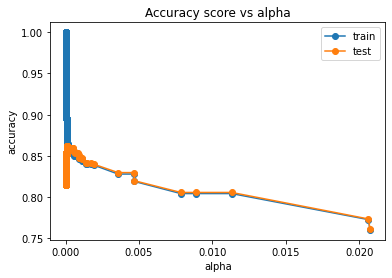

In [31]:
#Post-pruning
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# compute ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot train and test score for each of the above trained model    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()

In [32]:
print(np.max(test_scores))

0.8618458766685775


In [33]:
ind = test_scores.index(np.max(test_scores))
print(train_scores[ind])
print(test_scores[ind])
print(ccp_alphas[ind])

0.871365783079905
0.8618458766685775
9.16003553398435e-05


In [34]:
################################### Random forest
clf = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 10, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [35]:
pred_forest = clf.predict(X_test)
accuracy_score(y_test, pred_forest)

0.8633199574154451

In [36]:
clf.score(X_train, y_train)

0.8675438835958614

In [37]:
clf.score(X_test, y_test)

0.8633199574154451

In [38]:
#Pre-pruning
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

clf = RandomForestClassifier(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring="accuracy", n_jobs=-1, cv=3).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)

Param for GS {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}
CV score for GS 0.8656328829778998


In [39]:
grid_cv.score(X_train, y_train)

0.9141983565832219

In [40]:
grid_cv.score(X_test, y_test)

0.8684792400294816

In [41]:
#################### Randomized search 

In [42]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [44]:
rf = RandomForestClassifier(random_state=42, n_jobs = -1)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=  12.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   9.5s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   9.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  30.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  30.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  35.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [45]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [46]:
rf_random.score(X_train, y_train)

0.9157544156588682

In [47]:
rf_random.score(X_test, y_test)

0.8687249201539595